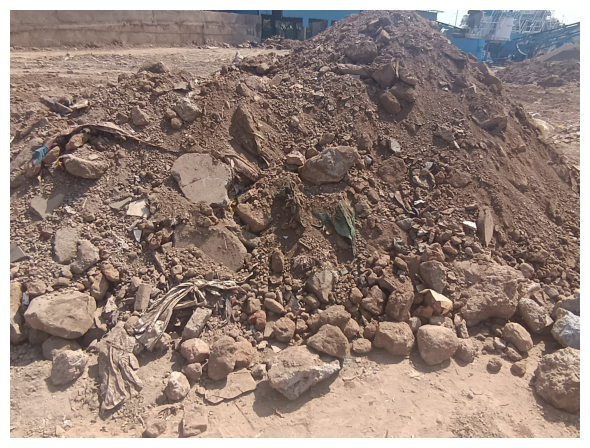

In [73]:

import tensorflow as tf
import matplotlib.pyplot as plt
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)
plt.rc('image', cmap='magma')

image_path = '2.jpeg'
image = tf.io.read_file(image_path)
image = tf.io.decode_jpeg(image)

plt.figure(figsize=(6, 6))
plt.imshow(tf.squeeze(image), cmap='gray')
plt.axis('off')
plt.show();

In [74]:
import tensorflow as tf
import numpy

# kernel = tf.constant([
#     [-1, -1, -1],
#     [-1,  8, -1],
#     [-1, -1, -1],
# ])

kernel = tf.constant([
    [0,0,0,0],
    [0,8,8,0],
    [0,6,6,0],
    [0,0,0,0]
])


In [75]:
# Reformat for batch compatibility.
image = tf.image.convert_image_dtype(image, dtype=tf.float32)
image = tf.expand_dims(image, axis=0)
kernel = tf.reshape(kernel, [*kernel.shape, 1, 1])
kernel = tf.cast(kernel, dtype=tf.float32)

In [76]:
len(image.shape)

4

In [77]:
image.shape

TensorShape([1, 2464, 3280, 3])

In [78]:
kernel.shape

TensorShape([4, 4, 1, 1])

In [79]:
# image_filter = tf.nn.conv2d(
#     input=image,
#     filters=kernel,
#     # we'll talk about these two in lesson 4!
#     # strides=1,
#     # padding='SAME',
# )
conv_fn=tf.nn.conv2d
image_filter = conv_fn(
    input=image,
    filters=kernel,
    strides=1, # or (1, 1)
    padding='SAME'
)

plt.imshow(
    # Reformat for plotting
    tf.squeeze(image_filter)
)
plt.axis('off')
plt.show();

plt.figure(figsize=(6, 6))
plt.imshow(tf.squeeze(image_filter))
plt.axis('off')
plt.show()

InvalidArgumentError: {{function_node __wrapped____MklNativeConv2D_device_/job:localhost/replica:0/task:0/device:CPU:0}} output depth must be evenly divisible by number of groups: 1 vs 3 [Op:Conv2D] name: 